<a href="https://colab.research.google.com/github/Akshayaa18S/GRADIENT-DESCENT/blob/main/Gradient%20Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

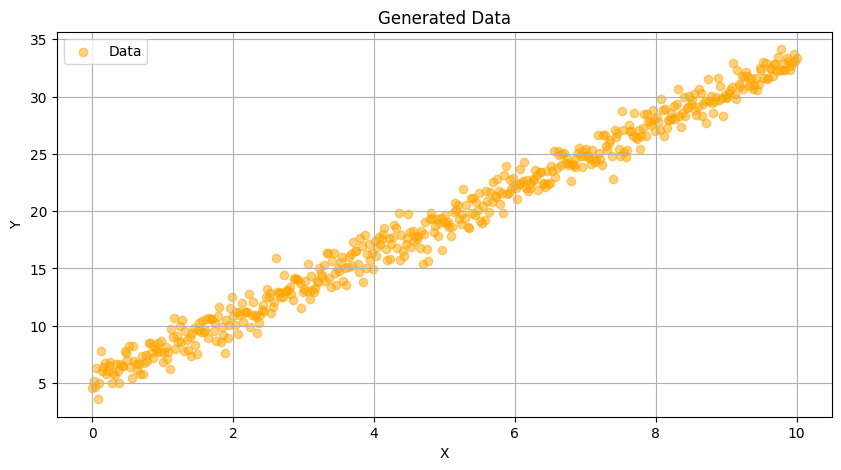

Early stopping at epoch 49 with loss 6.621078
Linear Search - Best Slope: 2.7879, Loss: 0.9316, Time: 0.001462s
Gradient Descent - Best Slope: 3.3697, Intercept: 0.5867, Loss: 6.6211, Time: 0.001373s


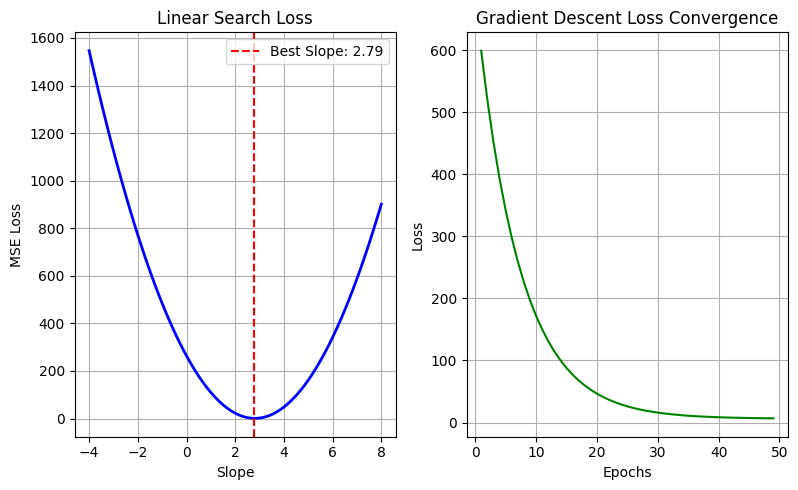

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Hyperparameters
LEARNING_RATE = 0.001  # Step size for gradient descent
EPOCHS = 60  # Number of iterations for gradient descent
SLOPE_RANGE = (-4, 8)  # Range of slopes to evaluate in linear search
POINTS = 100  # Number of points to evaluate in linear search
TOLERANCE = 1e-1  # Early stopping criterion for gradient descent

def generate_data():
    """
    Generates synthetic linear data with added Gaussian noise.
    Returns:
        x (numpy array): Input feature values.
        y (numpy array): Target values.
        true_intercept (float): The actual y-intercept used in data generation.
    """
    np.random.seed(40)
    x = np.linspace(0, 10, 500)
    true_slope, true_intercept = 2.8, 5.2
    noise = np.random.normal(0, 1, size=len(x))
    y = true_slope * x + true_intercept + noise

    # Plot generated data
    plt.figure(figsize=(10, 5))
    plt.scatter(x, y, color='orange', alpha=0.5, label='Data')
    plt.title("Generated Data")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend()
    plt.grid(True)
    plt.show()

    return x, y, true_intercept

def mse_loss(predicted_slope, intercept, x, y):
    """
    Computes the Mean Squared Error (MSE) loss.
    Args:
        predicted_slope (float): Slope value.
        intercept (float): Intercept value.
        x (numpy array): Input feature values.
        y (numpy array): Target values.
    Returns:
        float: MSE loss value.
    """
    predictions = predicted_slope * x + intercept
    return np.mean((y - predictions) ** 2)

def linear_search_best_slope(x, y, intercept):
    """
    Performs a brute-force search to find the best slope value that minimizes the MSE loss.
    Args:
        x (numpy array): Input feature values.
        y (numpy array): Target values.
        intercept (float): Intercept value assumed constant.
    Returns:
        best_slope (float): Optimal slope value found.
        min_loss (float): Minimum loss achieved.
        elapsed_time (float): Time taken for computation.
        slope_range (numpy array): Range of slopes evaluated.
        loss_values (list): Corresponding loss values for each slope.
    """
    slope_range = np.linspace(SLOPE_RANGE[0], SLOPE_RANGE[1], POINTS)
    start_time = time.time()
    loss_values = [mse_loss(m, intercept, x, y) for m in slope_range]
    elapsed_time = time.time() - start_time
    best_slope = slope_range[np.argmin(loss_values)]
    return best_slope, min(loss_values), elapsed_time, slope_range, loss_values

def gradient_descent(x, y, learning_rate=LEARNING_RATE, epochs=EPOCHS, tolerance=TOLERANCE):
    """
    Optimizes slope and intercept using gradient descent to minimize the MSE loss.
    Args:
        x (numpy array): Input feature values.
        y (numpy array): Target values.
        learning_rate (float): Step size for gradient descent.
        epochs (int): Number of iterations.
        tolerance (float): Early stopping threshold for loss improvement.
    Returns:
        slope (float): Optimized slope value.
        intercept (float): Optimized intercept value.
        loss_history (list): List of loss values over epochs.
        final_loss (float): Final loss value.
        elapsed_time (float): Time taken for computation.
    """
    np.random.seed(40)
    slope = np.random.randn()
    intercept = np.random.randn()
    loss_history = []
    start_time = time.time()

    for epoch in range(epochs):
        predictions = slope * x + intercept
        error = predictions - y
        loss = np.mean(error ** 2)

        if len(loss_history) > 0 and abs(loss_history[-1] - loss) < tolerance:
            print(f"Early stopping at epoch {epoch} with loss {loss:.6f}")
            break

        loss_history.append(loss)

        # Compute gradients
        slope_gradient = (2 / len(x)) * np.sum(error * x)
        intercept_gradient = (2 / len(x)) * np.sum(error)

        # Update parameters
        slope -= learning_rate * slope_gradient
        intercept -= learning_rate * intercept_gradient

    elapsed_time = time.time() - start_time
    return slope, intercept, loss_history, loss, elapsed_time

def plot_results(slope_range, loss_values, best_slope_linear, loss_history):
    """
    Plots results of linear search and gradient descent optimization.
    Args:
        slope_range (numpy array): Range of slopes evaluated.
        loss_values (list): Corresponding loss values.
        best_slope_linear (float): Best slope found using linear search.
        loss_history (list): Loss values across gradient descent epochs.
    """
    plt.figure(figsize=(12, 5))

    # Linear Search Loss Plot
    plt.subplot(1, 3, 1)
    plt.plot(slope_range, loss_values, color='blue', linewidth=2)
    plt.axvline(best_slope_linear, linestyle='--', color='red', label=f"Best Slope: {best_slope_linear:.2f}")
    plt.title("Linear Search Loss")
    plt.xlabel("Slope")
    plt.ylabel("MSE Loss")
    plt.legend()
    plt.grid(True)

    # Gradient Descent Convergence
    plt.subplot(1, 3, 2)
    plt.plot(range(1, len(loss_history) + 1), loss_history, color='green')
    plt.title("Gradient Descent Loss Convergence")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)

    plt.tight_layout()
    plt.show()

def main():
    """
    Main function to execute data generation, optimization, and visualization.
    """
    x, y, true_intercept = generate_data()
    best_slope_linear, min_loss_linear, time_linear, slope_range, loss_values = linear_search_best_slope(x, y, true_intercept)
    best_slope_gd, best_intercept_gd, loss_history, min_loss_gd, time_gd = gradient_descent(x, y)

    # Display results
    print(f"Linear Search - Best Slope: {best_slope_linear:.4f}, Loss: {min_loss_linear:.4f}, Time: {time_linear:.6f}s")
    print(f"Gradient Descent - Best Slope: {best_slope_gd:.4f}, Intercept: {best_intercept_gd:.4f}, Loss: {min_loss_gd:.4f}, Time: {time_gd:.6f}s")

    plot_results(slope_range, loss_values, best_slope_linear, loss_history)

if __name__ == "__main__":
    main()
